In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#link to video file
Video_FILE = "./Camera_17_59_07.avi"

In [3]:
#an iterator which iterates through all the frames
    
def foreach_frame(filename):
    video=cv2.VideoCapture(filename)
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    for fno in range(0, total_frames, 1):
        video.set(cv2.CAP_PROP_POS_FRAMES, fno)
        _, frame = video.read()
        yield frame
    video.release()

#return the frame  at a specific index 
def get_frame(filename,index):
    counter=0
    video=cv2.VideoCapture(filename)
    while video.isOpened():
        rete,frame=video.read()
        if rete:
            if counter==index:
                return frame
            counter +=1
        else:
            print("WARNING: Index out of bound [0," + str(counter) + ")")
            break
    video.release()
    return None


In [5]:
#checking: opening all frames and closing all the opened windows
for f in foreach_frame(Video_FILE):
    if f is None:
        break
    cv2.imshow('frame',f)
    if cv2.waitKey(10) == 40:
        break
cv2.destroyAllWindows()

In [6]:
#count number of frames
video=cv2.VideoCapture(Video_FILE)
count=int(video.get(cv2.CAP_PROP_FRAME_COUNT))
video.release()
print('Total no of frames: ',count)
#dimension of frames
frame  = get_frame(Video_FILE,0)
pixel = np.shape(frame)
print("pixels "+ str(pixel[1]) + "x"+ str(pixel[0]) )

Total no of frames:  256
pixels 400x250


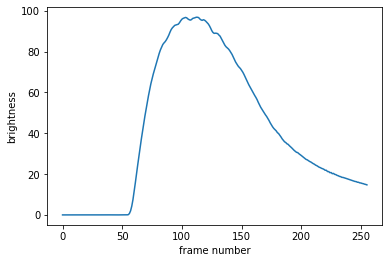

In [7]:
###find a way to remove frames which are dark


#function for calculating brightness
from PIL import Image,ImageStat
def brightness( im_file ):
    img = Image.fromarray(im_file, 'RGB').convert('L')
    stat = ImageStat.Stat(img)
    return stat.mean[0]

##brightness vs time (or frame)
bright = []
for f2 in foreach_frame(Video_FILE):
    if f2 is None:
        break
    b = brightness(f2)
    bright.append(b)

plt.plot(bright)
plt.ylabel('brightness')
plt.xlabel('frame number')
plt.show()



shape is (250, 400, 3)
pixel at (60,21) [90 90 90]
pixel at (120,10) [88 88 88]


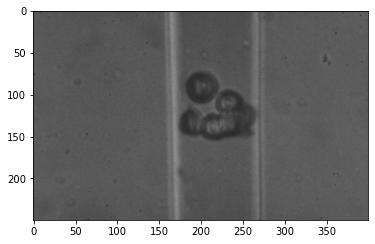

In [8]:
#View a sample frame
frame = get_frame(Video_FILE,127)
print('shape is', frame.shape)
print('pixel at (60,21)',frame[60,21,:])
print('pixel at (120,10)',frame[120,10,:])
plt.imshow(frame)

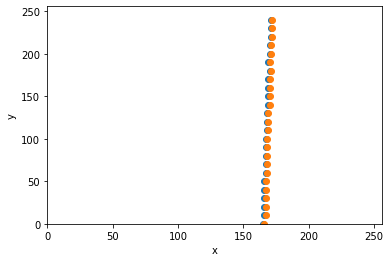

In [15]:
#find two lines y = mx + a, y = mx + b that represents the two line segments
def foreach_frame_2(filename, firstframe, lastframe, framerate):
    video=cv2.VideoCapture(filename)
    totalframes = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    lframe = min(totalframes, lastframe)
    for fno in range(firstframe, lframe, framerate):
        video.set(cv2.CAP_PROP_POS_FRAMES, fno)
        _, frame = video.read()
        yield frame
    video.release()
    
x1 = []; y1 = []; x2 = []; y2 = [];
for f in foreach_frame_2(Video_FILE,  70, 150, 100):
    if f is None:
        break
    img = Image.fromarray(f, 'RGB').convert('L')
    f2 = np.array(img)
    imax,jmax = np.shape(img)
    for i in range(0, imax, 10):
        x1.append(float(i));
        x2.append(float(i));
        max1 = 0; max2 = 0; locj1 = 0; locj2 = 0;
        for j in range(0, jmax, 1):
            if f2[i][j]>max1:
                max2 =  max1; locj2 = locj1;
                max1 = f2[i][j]; locj1 = j;
            elif f2[i][j]>max2:
                max2 = f2[i][j]; locj2 = j;
        if locj1 < locj2:
            y1.append(locj1); y2.append(locj2);
        else:
            y1.append(locj2); y2.append(locj1);

            
plt.scatter(y1, x1)
plt.scatter(y2, x2)

plt.axis([0,256,  0,256])

plt.ylabel('y')
plt.xlabel('x')
plt.show()





In [19]:
#create  a new video (trimmed)
frame0 = get_frame(Video_FILE,0)
np.shape(frame0)
pix = np.shape(frame0)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 1, (pix[0], pix[1]))
for f in foreach_frame_2(Video_FILE,  70, 150, 1):
    out.write(f)

out.release()

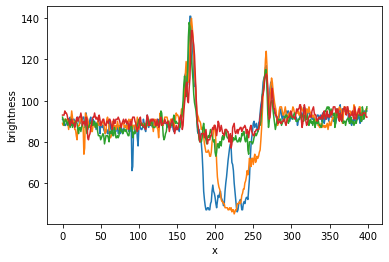

In [41]:
#analyse the sample frame

#brightness vs x (for different y)
img = Image.fromarray(frame, 'RGB').convert('L')

I = np.array(img)
plt.plot(I[100,:])
plt.plot(I[150,:])
plt.plot(I[50,:])
plt.plot(I[200,:])

plt.ylabel('brightness')
plt.xlabel('x')
plt.show()

pixel at (120,10) [88 88 88]


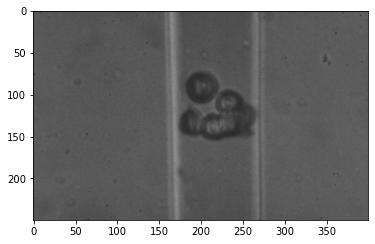

In [9]:
# Modifying video frames using NumPy

fix_frame=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
print('pixel at (120,10)',fix_frame[120,10,:])
plt.imshow(fix_frame)

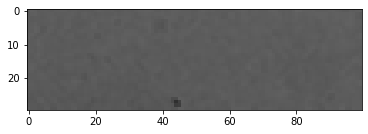

In [10]:
plt.imshow(fix_frame[220:430,300:600])


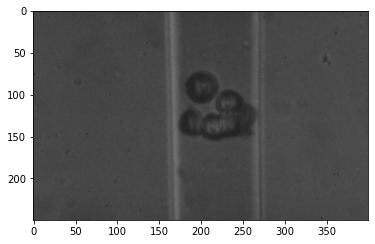

In [11]:
adjust_brightness=0.8*fix_frame
adjust_brightness=adjust_brightness.astype(np.uint8)
plt.imshow(adjust_brightness)